尝试将LMS算法改为使用小批量数据训练。观察并对比收敛速度。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

LMS算法实现

In [2]:
def model(X, W, b):
    '''
    X: 模型输入向量
    W: 模型连接权重向量
    b: 模型的偏执值
    
    return: 返回模型输出结果
    '''
    X = np.array(X)
    return np.sum(X * W)+b  #y = w*x +b

生成数据集并进行可视化，数据集有两个属性组成。  
左图是两个属性x_1,x_2构成的图  
右图是属性x与标记y的图，属性x进行了降维处理

In [3]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
tmp_grad_w = 0
tmp_grad_b = 0
num_train = 1000  #数据集样本数量
num_test = 100  #测试集样本数量
data = make_regression(n_samples = num_train, n_features = 2)  #生成数据集

Text(0, 0.5, 'y')

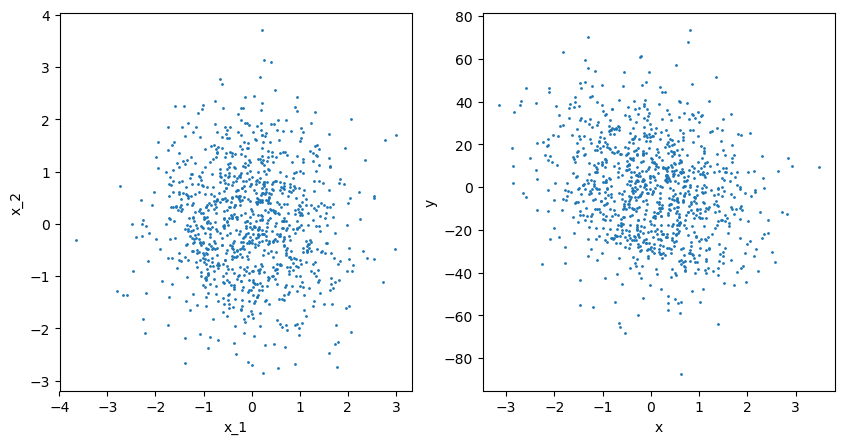

In [5]:
#数据集可视化
plt.figure(figsize = [10,5], dpi = 100)
#左图
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
#右图
plt.subplot(1, 2, 2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
#将数据集分割
#将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

In [7]:
from sklearn.metrics import mean_squared_error as mse

In [8]:
train_steps = 2000  #训练次数
lr = 0.01  #学习率
summary_step = 20  #摘要频率
summary = []  #摘要

W = np.random.randn(2)  #初始化连接权重
b = 0  #初始化偏置值

In [9]:
for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    tmp_grad_w += dW
    tmp_grad_w += db
        
    if i %32 == 31:
        W = W - lr * tmp_grad_w/32
        B = W - lr * tmp_grad_b/32
        tmp_grad_w=0
        tmp_grad_b=0

Text(0, 0.5, 'losses')

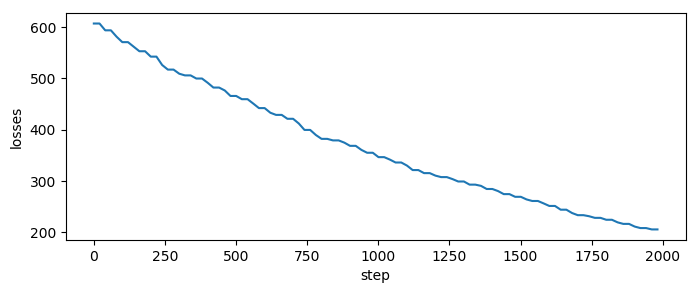

In [10]:
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')